<a href="https://colab.research.google.com/github/pratimavermaa/YoloV3/blob/master/90CustomImages_2steps_YoloV3Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/pratimavermaa/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 422, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 422 (delta 34), reused 218 (delta 17), pack-reused 168
Receiving objects: 100% (422/422), 28.58 MiB | 3.34 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#  !unzip '/content/YoloV3/data/customdata.zip' -d '/content/YoloV3/data/customdata'

In [17]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [18]:
ls

 90Images_2steps_YoloV3Sample.ipynb       out_out/       test.py
 All3K+Images_2steps_YoloV3Sample.ipynb   output/        ting
 annotation_tool/                         __pycache__/   train.py
 cfg/                                     README.md     'ubdivisions=1'
 data/                                    results.json   utils/
 detect.py                                results.png    vim.exe.stackdump
 models.py                                runs/          weights/


In [ ]:
# cd YoloV3/

In [19]:
%cd /content/YoloV3

/content/YoloV3


In [20]:
!ls

 90Images_2steps_YoloV3Sample.ipynb	  out_out	 test.py
 All3K+Images_2steps_YoloV3Sample.ipynb   output	 ting
 annotation_tool			  __pycache__	 train.py
 cfg					  README.md	'ubdivisions=1'
 data					  results.json	 utils
 detect.py				  results.png	 vim.exe.stackdump
 models.py				  runs		 weights


In [21]:
!mkdir weights
!cp /content/gdrive/My\ Drive/My_files/yolov3-spp-ultralytics.pt ./weights/
# /content/gdrive/MyDrive/My_files/yolov3-spp-ultralytics.pt

mkdir: cannot create directory ‘weights’: File exists


Image Path

**Extract Labels and and Image Shapes**


In [22]:
!python train.py --data data/smalcoco/smalcoco.data --batch 9 --cache --epochs 300 --nosave


Namespace(accumulate=4, adam=False, batch_size=9, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-08-05 09:19:54.089543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4533.40it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 121.72it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:0

**custom.txt give image path/ image names in the same sequence as its in images folder else will get cv2 error  also train in small batches or save weights**

In [33]:
!python train.py --data data/customdata/custom.data --batch 9 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=9, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-08-05 09:53:27.984722: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (90 found, 0 missing, 0 empty, 0 duplicate, for 90 images): 100% 90/90 [00:00<00:00, 4923.08it/s]
Caching images (0.0GB): 100% 90/90 [00:01<00:00, 62.35it/s]
Reading image shapes: 100% 90/90 [00:00<00:00, 2373.81it/s]
Caching labels (90 found, 0 missing

In [34]:

!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/90 data/customdata/images/PV001.jpg: 512x320 6 hardhats, 3 bootss, Done. (0.017s)
image 2/90 data/custo

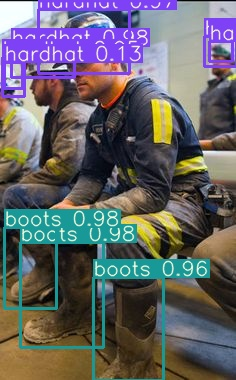

In [35]:
Image(filename='out_out/PV001.jpg', width=600)

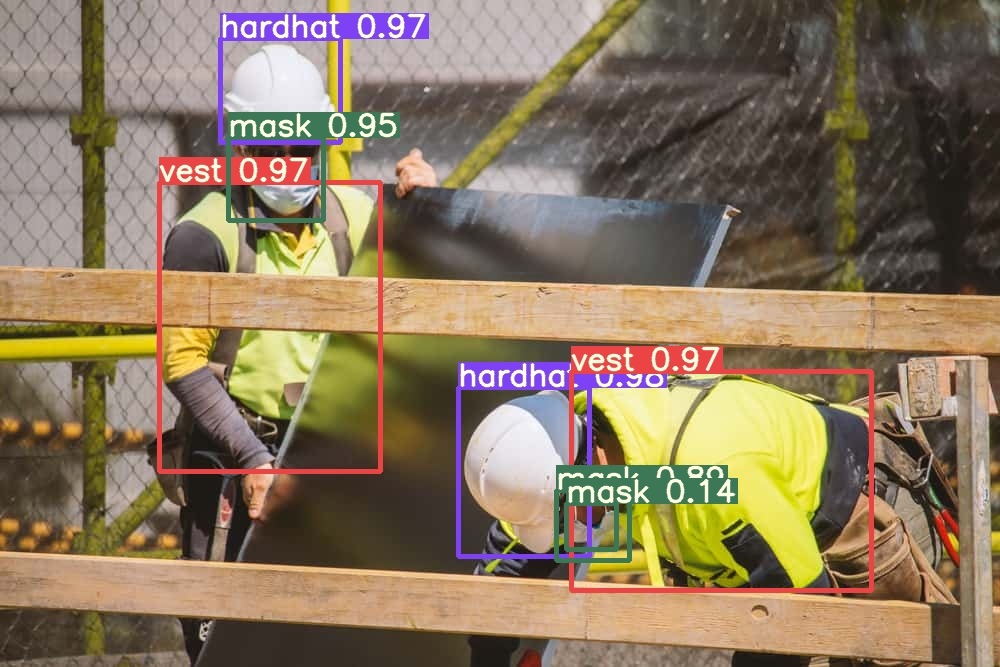

In [36]:
Image(filename='out_out/PV020.jpg', width=600)

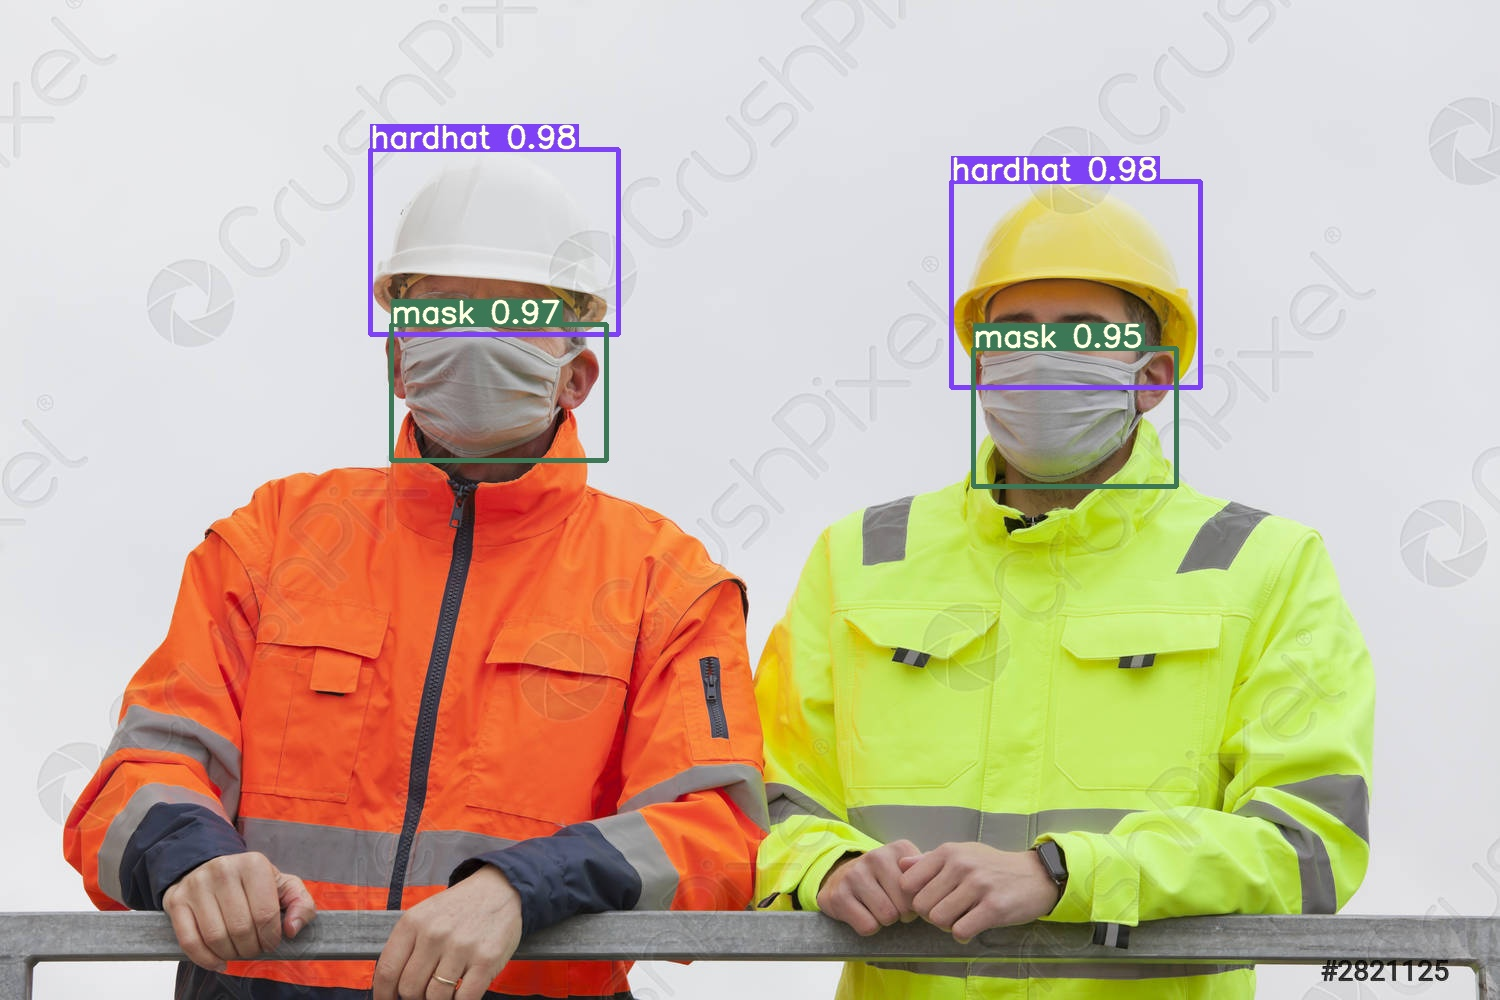

In [37]:
Image(filename='out_out/PV014.jpg', width=600)

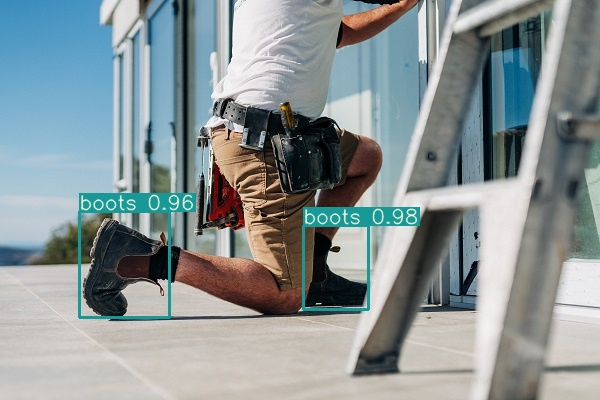

In [38]:
Image(filename='out_out/PV099.jpg', width=600)

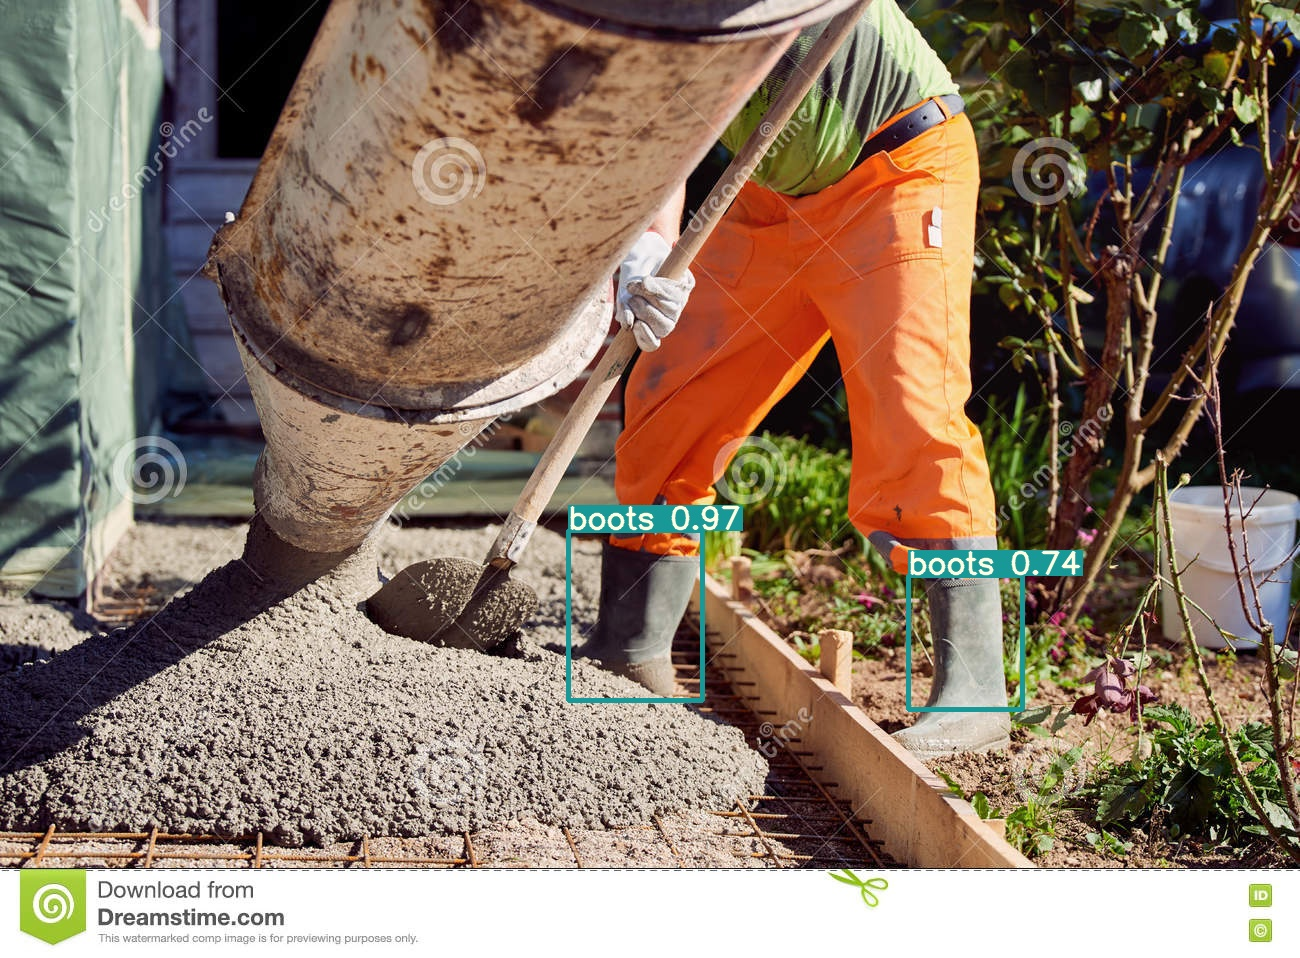

In [39]:
Image(filename='out_out/PV067.jpg', width=600)

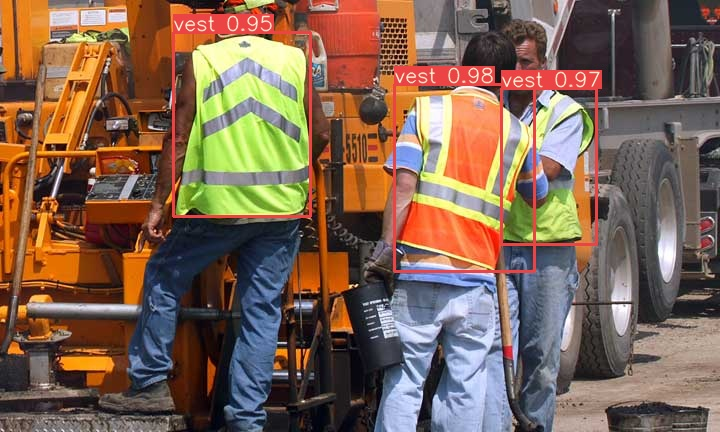

In [40]:
Image(filename='out_out/PV076.jpg', width=600)